In [57]:
import matplotlib.pyplot as plt

In [190]:
import pandas as pd
df=pd.read_csv("data-jobs-listings-glassdoor//glassdoor_reviews.csv")

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422180 entries, 0 to 422179
Data columns (total 28 columns):
id                                               422180 non-null int64
index                                            343221 non-null float64
reviews.val.cons                                 343214 non-null object
reviews.val.date                                 343221 non-null object
reviews.val.featured                             343221 non-null object
reviews.val.helpfulCount                         343221 non-null float64
reviews.val.id                                   343221 non-null float64
reviews.val.pros                                 343221 non-null object
reviews.val.publishedOn                          343221 non-null object
reviews.val.publisher                            343083 non-null object
reviews.val.reviewRatings.careerOpportunities    343221 non-null float64
reviews.val.reviewRatings.compBenefits           343221 non-null float64
reviews.val.reviewRat

In [192]:
df['reviews.val.pros']=df['reviews.val.pros'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422180 entries, 0 to 422179
Data columns (total 28 columns):
id                                               422180 non-null int64
index                                            343221 non-null float64
reviews.val.cons                                 343214 non-null object
reviews.val.date                                 343221 non-null object
reviews.val.featured                             343221 non-null object
reviews.val.helpfulCount                         343221 non-null float64
reviews.val.id                                   343221 non-null float64
reviews.val.pros                                 422180 non-null object
reviews.val.publishedOn                          343221 non-null object
reviews.val.publisher                            343083 non-null object
reviews.val.reviewRatings.careerOpportunities    343221 non-null float64
reviews.val.reviewRatings.compBenefits           343221 non-null float64
reviews.val.reviewRat

In [193]:
df['reviews.val.cons']=df['reviews.val.cons'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422180 entries, 0 to 422179
Data columns (total 28 columns):
id                                               422180 non-null int64
index                                            343221 non-null float64
reviews.val.cons                                 422180 non-null object
reviews.val.date                                 343221 non-null object
reviews.val.featured                             343221 non-null object
reviews.val.helpfulCount                         343221 non-null float64
reviews.val.id                                   343221 non-null float64
reviews.val.pros                                 422180 non-null object
reviews.val.publishedOn                          343221 non-null object
reviews.val.publisher                            343083 non-null object
reviews.val.reviewRatings.careerOpportunities    343221 non-null float64
reviews.val.reviewRatings.compBenefits           343221 non-null float64
reviews.val.reviewRat

In [ ]:
df["reviews.val.pros"]=df["reviews.val.pros"].fillna("")
df["reviews.val.cons"]=df["reviews.val.cons"].fillna("")

In [337]:
df.head(20)


,id,index,reviews.val.cons,reviews.val.date,reviews.val.featured,reviews.val.helpfulCount,reviews.val.id,reviews.val.pros,reviews.val.publishedOn,reviews.val.publisher,...,reviews.val.reviewerStatus,reviews.val.summaryPoints.ceoApproval,reviews.val.summaryPoints.outlook,reviews.val.summaryPoints.recommend,reviews.val.title,reviews.val.adviceToManagement,reviews.val.companyResponse,reviews.val.reviewResponses,pros_count,cons_count
0,44001,0.0,Still not big enough in market place,"Oct 20, 2010",False,0.0,689142.0,"Great brand , Good leadership , Clear business...","Oct 20, 2010",Director,...,Former Employee,1.0,0.0,1.0,American Express Japan - Excellent place to work,None,NaN,NaN,1,1
1,44002,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,44003,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3,44004,0.0,Nothing important on my point of view.,4 weeks ago,False,0.0,29659857.0,"Learn new technologies, helpful people, good m...",4 weeks ago,Software Engineer(Internship),...,Former Employee,1.0,1.0,1.0,one of the best places to be intern in,NaN,NaN,NaN,5,5
4,44004,1.0,Alot of friends working together which isn't v...,"May 29, 2019",False,0.0,26381884.0,Very good opportunities to learn technologies,"May 29, 2019",Network Engineer,...,Current Employee,1.0,1.0,1.0,Very Good Company,NaN,NaN,NaN,5,5
5,44004,2.0,Working hours are not good and need to add the...,"Mar 13, 2019",False,0.0,25136975.0,You can learn technically a lot in this company.,"Mar 13, 2019",Das RF Design Engineer,...,Former Employee,0.0,0.0,0.0,It is good company with large potential in tel...,NaN,NaN,NaN,5,5
6,44004,3.0,No Real Cons at all,"Feb 18, 2019",False,0.0,24751800.0,- Very friendly environment.\r\n- Highly exper...,"Feb 18, 2019",Software Engineering Intern,...,Former Employee,1.0,1.0,1.0,Great Environment to work and learn,Just keep your motivation and spirit.,NaN,NaN,5,5
7,44004,4.0,"Little supervision, no precise individuals-fee...","Jan 19, 2019",False,0.0,24288425.0,"Great environment, helpful people, tensionless...","Jan 19, 2019",Software Engineer(Internship),...,Former Employee,0.0,0.0,1.0,Software Engineering Intern,Get your eyes closer on Interns.,NaN,NaN,5,5
8,44005,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
9,44006,NaN,nan,NaN,NaN,NaN,NaN,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [211]:
df["pros_count"]=df.groupby("id")["reviews.val.pros"].transform('count')#["reviews.val.pros"]
df["cons_count"]=df.groupby("id")["reviews.val.cons"].transform('count')#["reviews.val.pros"]

new_df=df[["id","reviews.val.pros","pros_count","reviews.val.cons","cons_count"]].sort_values(by=["pros_count"],ascending=False)
new_df=new_df.head(500)
#new_df
new_df_cons=df[["id","reviews.val.pros","pros_count","reviews.val.cons","cons_count"]].sort_values(by=["cons_count"],ascending=False)
new_df_cons=new_df.head(500)
new_df_cons

,id,reviews.val.pros,pros_count,reviews.val.cons,cons_count
315559,108176,If you are into a fast-paced financial service...,6,"Very skinny contracts in terms of benefits, wo...",6
112288,99163,"Time excelente, provavelmente o melhor da Amer...",6,"Apesar da carga horária flexível, é normal tra...",6
112286,99163,"Ambiente legal, bastante liberdade de aprender...",6,Empresa se encontra em uma cidade que nem todo...,6
330050,55885,"Great support from everyone around, everyone g...",6,"When vendors come in, they always bring pizzas...",6
330051,55885,Fast Track 20 executives are given the time an...,6,Difficult to uphold a work/life balance. Havin...,6
...,...,...,...,...,...
252668,148912,Great career opportunity with lots of projects...,5,The over-time issue sometimes occurs when the ...,5
252667,148912,"Great place to work, lots of things to learn.",5,has to be comfortable working in fast-paced en...,5
252783,148964,Good benefits\r\nNice people\r\nFlexible worki...,5,"not really any cons, the network is not Oracle...",5
252788,148968,"Cool company, great onboarding for all the int...",5,a bit unorganised within my team,5


In [344]:
df["cons_count"]=df.groupby("id")["reviews.val.cons"].transform('count')#["reviews.val.pros"]
new_df_cons=df[["id","reviews.val.pros","pros_count","reviews.val.cons","cons_count"]].sort_values(by=["cons_count"],ascending=False)
new_df_cons=new_df.head(500)
new_df_cons[["reviews.val.cons","cons_count"]]

,reviews.val.cons,cons_count
315559,"Very skinny contracts in terms of benefits, wo...",6
112288,"Apesar da carga horária flexível, é normal tra...",6
112286,Empresa se encontra em uma cidade que nem todo...,6
330050,"When vendors come in, they always bring pizzas...",6
330051,Difficult to uphold a work/life balance. Havin...,6
...,...,...
252668,The over-time issue sometimes occurs when the ...,5
252667,has to be comfortable working in fast-paced en...,5
252783,"not really any cons, the network is not Oracle...",5
252788,a bit unorganised within my team,5


In [345]:
#!pip install nltk
#import nltk
#nltk.download("punkt")
from nltk.tokenize import word_tokenize
new_df["tokenize_pros"]=new_df["reviews.val.pros"].apply(word_tokenize)
new_df["tokenize_cons"]=new_df["reviews.val.cons"].apply(word_tokenize)

print(new_df.head(1))




            id                                   reviews.val.pros  pros_count  \
315559  108176  If you are into a fast-paced financial service...           6   
112288   99163  Time excelente, provavelmente o melhor da Amer...           6   
112286   99163  Ambiente legal, bastante liberdade de aprender...           6   
330050   55885  Great support from everyone around, everyone g...           6   
330051   55885  Fast Track 20 executives are given the time an...           6   
330052   55885  You are instantly welcomed to the Vohkus Famil...           6   
330053   55885  I came into the Vohkus Family nearly 5 and a h...           6   
330054   55885  The team is amazing, and the work environment ...           6   
219999  144269  The course is perfectly planned for those who ...           6   
220000  144269  Great support from everyone around, everyone g...           6   

                                         reviews.val.cons  cons_count  \
315559  Very skinny contracts in te

In [347]:
#nltk.download('stopwords')
#new_df.drop("pros_no_stop_words",axis=1,inplace=True)
from nltk.corpus import stopwords
stop = stopwords.words('english')
new_df["pros_no_stop_words"]=new_df['tokenize_pros'].apply(lambda x: [item for item in x if item not in stop])
new_df["cons_no_stop_words"]=new_df['tokenize_cons'].apply(lambda x: [item for item in x if item not in stop])

new_df.head(1)

,id,reviews.val.pros,pros_count,reviews.val.cons,cons_count,tokenize_pros,tokenize_cons,pros_no_stop_words,pros_no_stop_words_lemi,final_pros_text,str_pros_no_stop_words_lemi,cons_no_stop_words
315559,108176,If you are into a fast-paced financial service...,6,"Very skinny contracts in terms of benefits, wo...",6,"[If, you, are, into, a, fast-paced, financial,...","[Very, skinny, contracts, in, terms, of, benef...","[If, fast-paced, financial, services, environm...","[If, fast-pac, financi, servic, environ, commi...","315559 [If, fast-pac, financi, servic, envi...",if fast-paced financial services environment c...,"[Very, skinny, contracts, terms, benefits, ,, ..."


In [253]:
from nltk.stem import PorterStemmer 
#from nltk.tokenize import word_tokenize 
ps = PorterStemmer() 
new_df["pros_no_stop_words_lemi"]=new_df['pros_no_stop_words'].apply(lambda x: [ps.stem(word) for word in x])
new_df["pros_no_stop_words_lemi"]
#new_df.head(10)
#print(type(new_df["pros_no_stop_words_lemi"]))

315559    [If, fast-pac, financi, servic, environ, commi...
112288    [time, excelent, ,, provavelment, melhor, da, ...
112286    [ambient, legal, ,, bastant, liberdad, de, apr...
330050    [great, support, everyon, around, ,, everyon, ...
330051    [fast, track, 20, execut, given, time, resourc...
                                ...                        
252668    [great, career, opportun, lot, project, gain, ...
252667        [great, place, work, ,, lot, thing, learn, .]
252783    [good, benefit, nice, peopl, flexibl, work, hour]
252788    [cool, compani, ,, great, onboard, intern, ,, ...
252639    [decent, benefit, tech, firm, ,, good, work-li...
Name: pros_no_stop_words_lemi, Length: 500, dtype: object

In [277]:
new_df["str_pros_no_stop_words_lemi"]=new_df["pros_no_stop_words"].apply(lambda x: " ".join(w.lower() for w in x))
new_df["str_pros_no_stop_words_lemi"].head(10)

315559    if fast-paced financial services environment c...
112288    time excelente , provavelmente melhor da ameri...
112286    ambiente legal , bastante liberdade de aprende...
330050    great support everyone around , everyone gets ...
330051    fast track 20 executives given time resources ...
330052    you instantly welcomed vohkus family open arms...
330053    i came vohkus family nearly 5 half years ago ,...
330054    the team amazing , work environment nice positive
219999    the course perfectly planned wish kick-start c...
220000    great support everyone around , everyone gets ...
Name: str_pros_no_stop_words_lemi, dtype: object

In [278]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()
tf_pros=tf_idf.fit_transform(new_df["str_pros_no_stop_words_lemi"])
print(tf_pros)

  (0, 378)	0.15003146698810169
  (0, 790)	0.3350594407303229
  (0, 1190)	0.3463203229262781
  (0, 1933)	0.36010252887231536
  (0, 366)	0.2976221568524226
  (0, 680)	0.16067777839210756
  (0, 1818)	0.37787088267936886
  (0, 788)	0.3035088809772321
  (0, 1450)	0.3463203229262781
  (0, 774)	0.2469152330821489
  (0, 998)	0.2922479987812769
  (1, 1340)	0.08727945626862155
  (1, 1242)	0.08727945626862155
  (1, 495)	0.08727945626862155
  (1, 1274)	0.07999200484951605
  (1, 1337)	0.08727945626862155
  (1, 695)	0.08727945626862155
  (1, 1764)	0.08727945626862155
  (1, 400)	0.08727945626862155
  (1, 1441)	0.08727945626862155
  (1, 1548)	0.08727945626862155
  (1, 1330)	0.075191883312586
  (1, 182)	0.08727945626862155
  (1, 1030)	0.08727945626862155
  (1, 1368)	0.08727945626862155
  :	:
  (497, 1481)	0.28160166184567864
  (497, 2241)	0.33688185555426076
  (497, 893)	0.2720204180186704
  (498, 1082)	0.40038735745997905
  (498, 41)	0.40038735745997905
  (498, 2035)	0.3755013107851286
  (498, 1541)	0

In [358]:
from collections import Counter
from collections import defaultdict,OrderedDict

counted_values_pros = new_df['pros_no_stop_words'].apply(lambda x: Counter(x))
#counted_values = new_df['pros_no_stop_words_lemi'].apply(lambda x: 
counted_values_pros
counted_values_cons = new_df['cons_no_stop_words'].apply(lambda x: Counter(x))
d_pros=defaultdict(int)
for l in counted_values_pros:
    for word ,freq in l.items():
        d_pros[word]+=1
#print(sorted(d),"\n")
d_cons=defaultdict(int)
for l in counted_values_cons:
    for word ,freq in l.items():
        d_cons[word]+=1

import operator
sorted_pros_freq_words = sorted(d_pros.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_pros_freq_words)
print(len(sorted_pros_freq_words))
# from sklearn.feature_extraction.text import CountVectorizer

# texts=["dog cat fish","dog cat cat","fish bird","bird"]
# cv = CountVectorizer()
# counted_values = cv.fit_transform(df['col']).toarray()
# df2 = pd.DataFrame(counted_values, columns=cv.get_feature_names())
# df2.iloc[0:5, 0:5]

[(',', 280), ('.', 265), ('work', 150), ('company', 112), ('people', 109), ('good', 95), ('environment', 93), ('great', 89), ('-', 81), ('working', 73), ('The', 69), ('team', 64), ('culture', 64), ('Great', 63), ('I', 61), ('Good', 60), ("'s", 53), ('balance', 53), ('time', 45), ('opportunities', 45), (')', 45), ('office', 45), ('benefits', 43), ('(', 41), ('best', 39), ('really', 38), ('get', 36), ('It', 34), ('friendly', 34), ('career', 33), ('salary', 32), ('atmosphere', 32), ('one', 31), ('nice', 31), ('employees', 31), ('new', 30), ('things', 29), ('People', 29), ('management', 29), ('flexible', 29), ('lot', 29), ('You', 27), ('business', 27), ('hours', 27), ('job', 25), ('every', 25), ('learn', 25), ('everyone', 24), ('day', 24), ('teams', 24), ('experience', 22), ('home', 22), ('well', 22), ('life', 22), ('happy', 21), ('right', 21), ('open', 21), ('opportunity', 21), ('also', 21), ('projects', 21), ('support', 20), ('development', 20), ('food', 20), ('place', 20), ('colleagues'

In [359]:
sorted_cons_freq_words = sorted(d_cons.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_cons_freq_words)
print(len(sorted_cons_freq_words))

[('.', 248), (',', 206), ('-', 83), ('work', 76), ('I', 57), ('company', 54), ("n't", 52), ('lot', 44), ("'s", 40), ('people', 40), ('management', 40), ('sometimes', 38), ('(', 37), (')', 36), ('working', 35), ('time', 34), ('No', 34), ('It', 32), ('The', 32), ('team', 31), ('many', 30), ('get', 28), ('career', 28), ('much', 28), ('good', 26), ('need', 26), ('job', 24), ('really', 24), ('long', 24), ('environment', 24), ('!', 23), ('like', 23), ('Not', 23), ('teams', 22), ('managers', 22), ('cons', 21), ('due', 20), ('well', 20), ('salary', 20), ('office', 19), ('find', 19), ('new', 19), ('always', 18), ('development', 18), ('put', 18), ('de', 17), ('There', 17), ('want', 17), ('business', 17), ('process', 17), ('every', 17), ('little', 17), ('change', 17), ('go', 17), ('projects', 16), ('different', 16), ('lack', 16), ('changes', 16), ('Lack', 16), ('culture', 16), ('balance', 15), ('Lots', 15), ('hard', 15), ('fast', 15), ('structure', 15), ('even', 15), ('great', 15), ('things', 15)

In [375]:
def word_freq_plot(sorted_freq_words,w):
    fig,axs=plt.subplots(figsize=(10,15))
    c=0
    most_freq_words_list=[]
    most_freq_freq_list=[]

    for item in sorted_freq_words:
        most_freq_freq_list.append(item[1])
        most_freq_words_list.append(item[0])
#print(most_freq_words_list)
    df_freq_words=pd.DataFrame({"words":most_freq_words_list,"frequency":most_freq_freq_list})
    top_100_words=df_freq_words.head(100)
    top_100_words.plot.barh(x="words",y="frequency",ax=axs)
    axs.set_xlabel('Frequency')
    axs.set_ylabel('words')
    axs.set_title('Frequency of words for {}'.format(w))
    return most_freq_words_list



None


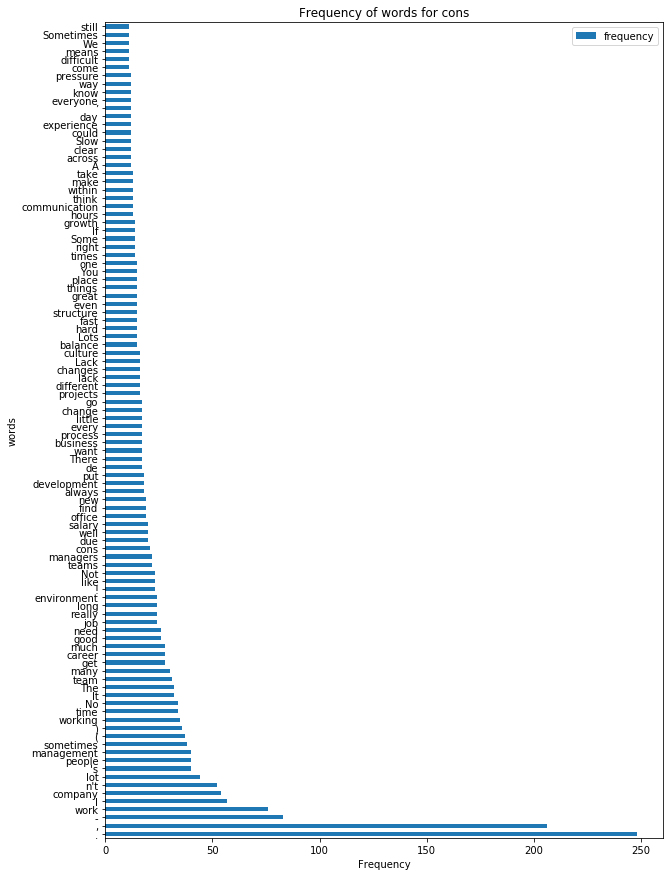

In [376]:
print(freq_words_pros)
freq_words_pros=word_freq_plot(sorted_cons_freq_words,"cons")


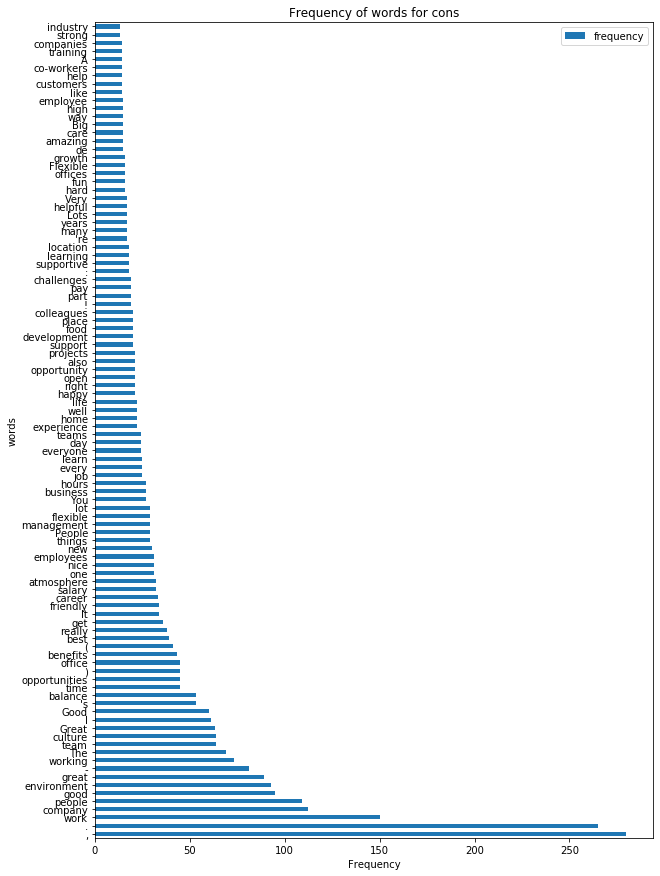

In [377]:
freq_words_cons=word_freq_plot(sorted_pros_freq_words,"cons")

In [378]:
common_words_pros_cons = [w for w in freq_words_pros if w in freq_words_cons]
common_words_pros_cons

['.',
 ',',
 '-',
 'work',
 'I',
 'company',
 "n't",
 'lot',
 "'s",
 'people',
 'management',
 'sometimes',
 '(',
 ')',
 'working',
 'time',
 'No',
 'It',
 'The',
 'team',
 'many',
 'get',
 'career',
 'much',
 'good',
 'need',
 'job',
 'really',
 'long',
 'environment',
 '!',
 'like',
 'teams',
 'managers',
 'due',
 'well',
 'salary',
 'office',
 'find',
 'new',
 'always',
 'development',
 'put',
 'de',
 'There',
 'want',
 'business',
 'process',
 'every',
 'little',
 'change',
 'go',
 'projects',
 'different',
 'changes',
 'culture',
 'balance',
 'Lots',
 'hard',
 'fast',
 'structure',
 'even',
 'great',
 'things',
 'place',
 'You',
 'one',
 'times',
 'right',
 'Some',
 'If',
 'growth',
 'hours',
 'communication',
 'think',
 'within',
 'make',
 'take',
 'A',
 'across',
 'clear',
 'could',
 'experience',
 'day',
 '’',
 'everyone',
 'know',
 'way',
 'pressure',
 'come',
 'difficult',
 'means',
 'We',
 'still',
 'issues',
 ';',
 'growing',
 'see',
 'manager',
 'progression',
 'decisions'

In [379]:
#new_df["pros_no_stop_words"]
# new_df["pros_no_stop_words"]=new_df["pros_no_stop_words"].apply(lambda x:' '.join([str(elem) for elem in x]))
# new_df["pros_no_stop_words"]
# word_freq_new_df=new_df["pros_no_stop_words"].str.split(expand=True).stack().value_counts()
# word_freq_new_df.head(100)
# word_freq.head(50)

top_N = 50
word_dist = nltk.FreqDist(new_df["str_pros_no_stop_words_lemi"])
print('All frequencies')
print('='*60)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
rslt

All frequencies


,Word,Frequency
0,all . people really care right thing work hard...,5
1,the best reasons work mathworks people culture...,5
2,great natick office transparency higher manage...,5
3,the management seemed really care employees ha...,5
4,-approachable co-workers ( although team-speci...,5
5,- wonderful organisation everyone trying best ...,5
6,"it 's environment allows get stuck , put hands...",5
7,the working environment culture suit really we...,5
8,big company - ftse100 member . people nice fri...,5
9,- being part team makes things happen - people...,5


In [363]:
word_freq=df["reviews.val.pros"].value_counts()


In [242]:
word_freq.head(50)

nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      78959
I have been working at Rakuten full-time (More than a year).  \r\nAmazing benefits for Full Time Employees including free food, stipends for gym memberships.\r\nGreat benefits and culture.                                                                                                                                                                                                                                                                             

In [292]:
#from sklearn.feature_extraction.text import CountVectorizer

#docs = ['why hello there', 'omg hello pony', 'she went there? omg']
#df["reviews.val.cons"]=df["reviews.val.cons"].replace(r"[^a-zA-Z\d\_]+", "")
#vec = CountVectorizer()
top_N = 50
word_dist = nltk.FreqDist(df["reviews.val.pros"])
print('All frequencies')
print('='*60)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
#rslt
#X = vec.fit_transform(df["reviews.val.pros"])
#n_df = pd.DataFrame(X.toarray())#, columns=vec.get_feature_names())
#print(n_df)

All frequencies


In [37]:
#print(df["reviews.val.pros"].value_counts())


In [317]:
def pros_cons_analysis2(column,keyword):
    fig,axs=plt.subplots(figsize=(20,5))
    pros_401=df[["id","reviews.val.pros","reviews.val.cons"]]
    pros_401=df[df[column].str.lower().str.contains(keyword)]
    grp_pros_401=pros_401.groupby("id",as_index=False).count().reset_index()#["reviews.val.pros"]
    #print(grp_pros_401)
    most_401_pros=grp_pros_401.sort_values(by=column,ascending=False)#["reviews.val.pros"]
    most_401_pros=most_401_pros.head(200)
    #print(most_401_pros.head(500))
    #print(type(most_401_pros))
    most_401_pros.plot.bar(x="id",y=column,ax=axs)
    axs.set_xlabel(keyword)
    axs.set_ylabel("Frequency")
    axs.set_title('Frequency of {} as pros in company review'.format(keyword))


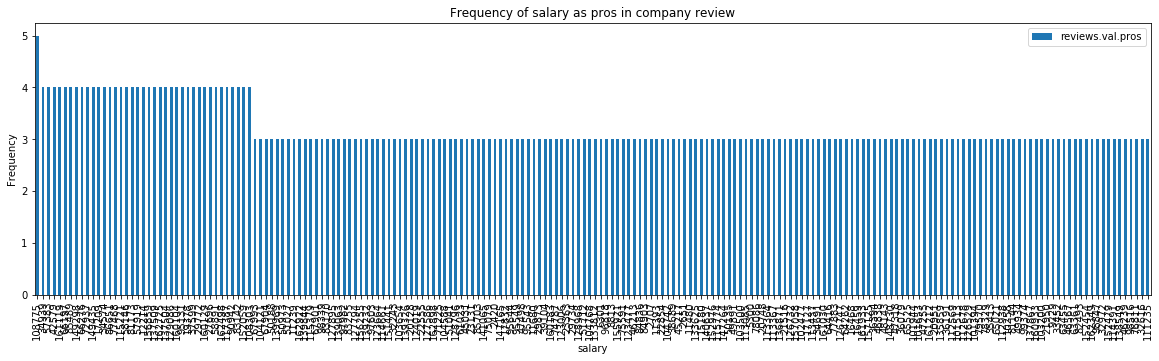

In [318]:
top_pros_salary_ids=pros_cons_analysis2("reviews.val.pros","salary")

In [319]:
def pros_cons_analysis(column,keyword):
    fig,axs=plt.subplots(figsize=(15,5))
    pros_401=df[df[column].str.lower().str.contains(keyword)]
    grp_pros_401=pros_401.groupby("id").count().reset_index()#["reviews.val.pros"]
    print(grp_pros_401)
    most_401_pros=grp_pros_401.sort_values(by=column,ascending=False)#["reviews.val.pros"]
    most_401_pros=most_401_pros.head(200)
    #print(most_401_pros.head(500))
    #print(type(most_401_pros))
    most_401_pros.plot.bar(x="id",y=column,ax=axs)
    #print(most_401_pros)
    #pros_cons_salary(most_401_pros,"reviews.val.pros","work life balance")

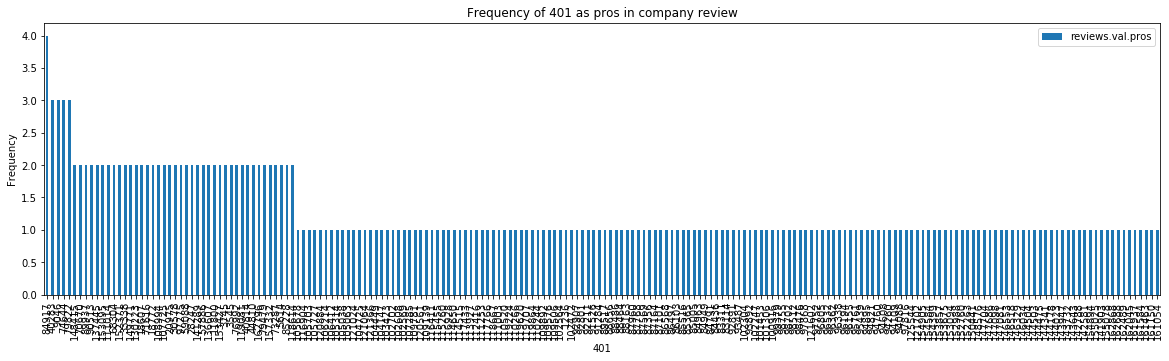

In [320]:
top_pros_salary_ids=pros_cons_analysis2("reviews.val.pros","401")




In [321]:
def pros_cons_salary(df,column,keyword):
    fig,axs=plt.subplots(figsize=(15,5))
    pros_401=df[df[column].str.lower().str.contains(keyword)]
    grp_pros_401=pros_401.groupby("id").count()#["reviews.val.pros"]
    most_401_pros=grp_pros_401.sort_values(by=column,ascending=False).reset_index()#["reviews.val.pros"]
    most_401_pros=most_401_pros.head(100)
    #print(most_401_pros.head(500))
    #print(type(most_401_pros))
    most_401_pros.plot.bar(x="id",y=column,ax=axs)
    
    return most_401_pros

#pros_cons_salary(pros_salary,"reviews.val.cons","work life balance")

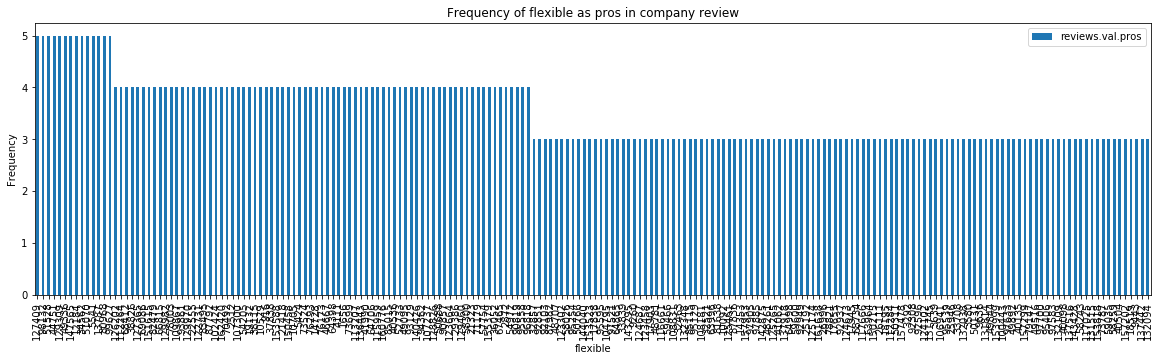

In [322]:
pros_cons_analysis2("reviews.val.pros","flexible")

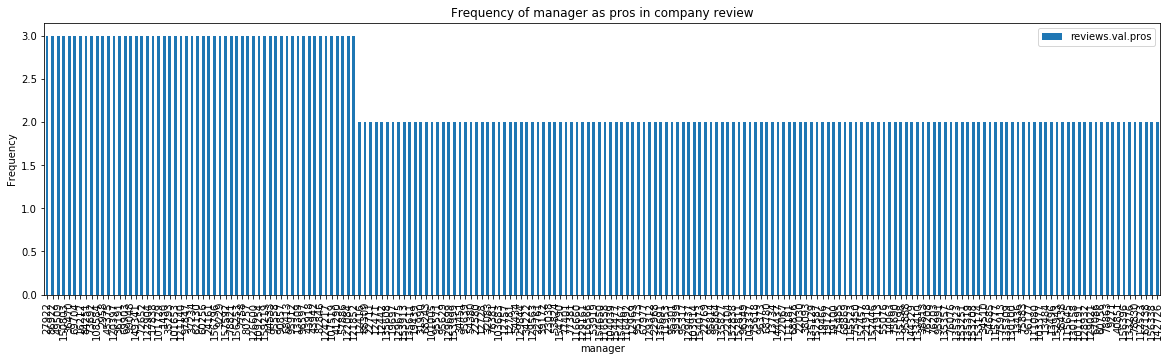

In [333]:
pros_cons_analysis2("reviews.val.pros","manager")

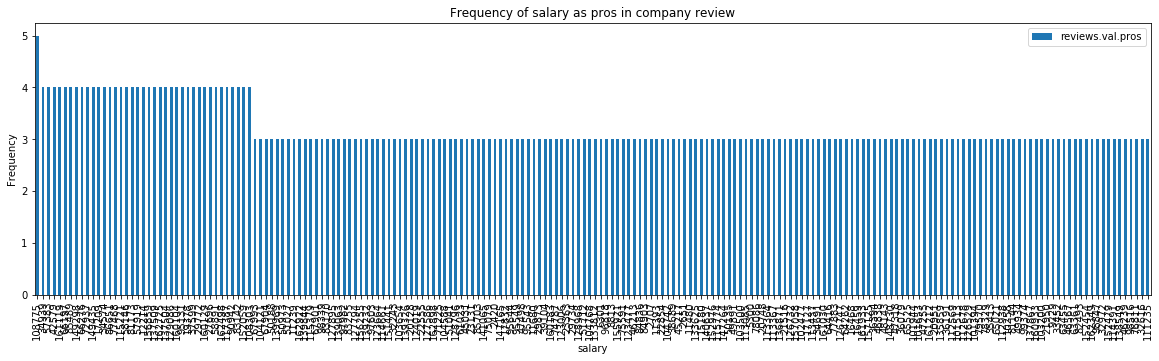

In [334]:
pros_cons_analysis2("reviews.val.pros","salary")

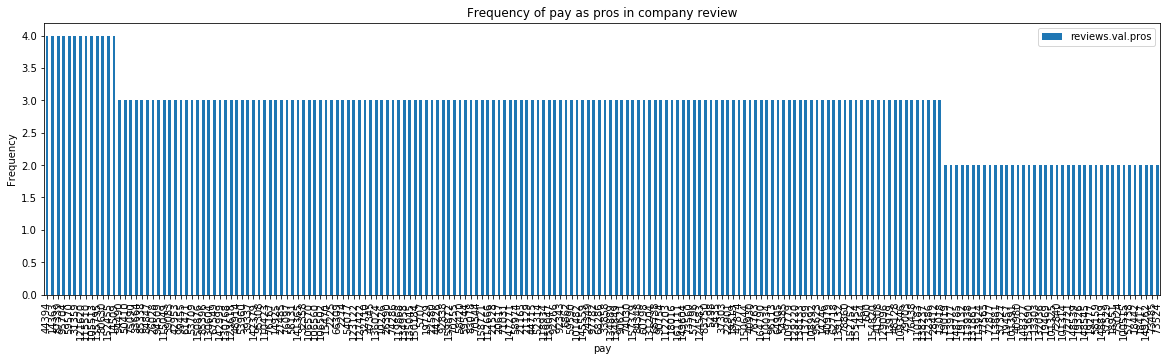

In [335]:
pros_cons_analysis2("reviews.val.pros","pay")

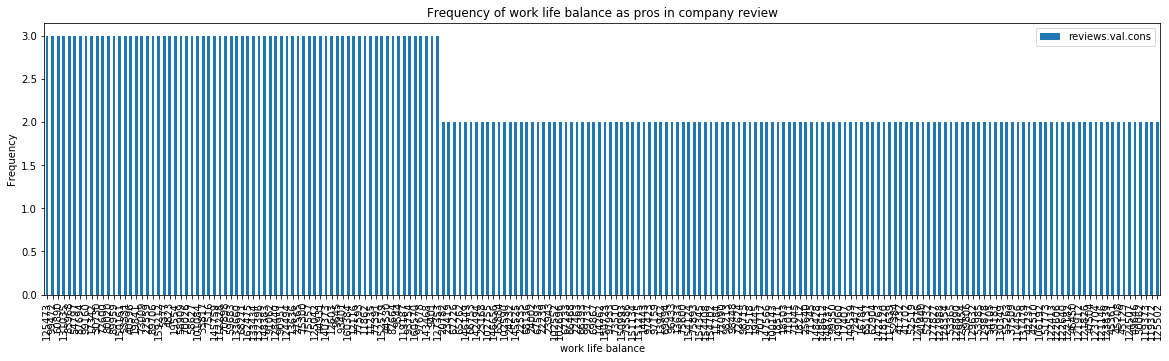

In [336]:
pros_cons_analysis2("reviews.val.cons","work life balance")

In [327]:
grp_company=df.groupby(["id"])["reviews.val.pros"]
grp_company

In [328]:
grp_company_pros_count=df.groupby(["id"]).count()["reviews.val.pros"]
top_20_company_pros_company=grp_company_pros_count.sort_values(ascending=False)#.head(500)
top_20_company_pros_company
#grp_company
#d=grp_company.count()
#d.head(1000,Truncate=False)


id
78561     6
125265    6
36737     6
101151    6
109614    6
         ..
94410     1
94412     1
94413     1
94414     1
1         1
Name: reviews.val.pros, Length: 165290, dtype: int64

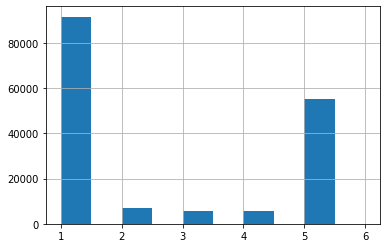

In [329]:
#b=top_20_company_pros_company.max()
top_20_company_pros_company.hist()#bins=b)

In [330]:
#checking if top pros commenter talked about 401k

top_20_company_pros_company=pd.DataFrame(top_20_company_pros_company)
pros_401=pd.DataFrame(pros_401)
top_20_company_pros_company.join(pros_401,lsuffix='_caller', rsuffix='_other')

,reviews.val.pros_caller,id,index,reviews.val.cons,reviews.val.date,reviews.val.featured,reviews.val.helpfulCount,reviews.val.id,reviews.val.pros_other,reviews.val.publishedOn,...,reviews.val.reviewerJobTitle,reviews.val.reviewerLocation,reviews.val.reviewerStatus,reviews.val.summaryPoints.ceoApproval,reviews.val.summaryPoints.outlook,reviews.val.summaryPoints.recommend,reviews.val.title,reviews.val.adviceToManagement,reviews.val.companyResponse,reviews.val.reviewResponses
id,,,,,,,,,,,,,,,,,,,,,
78561,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125265,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36737,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101151,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109614,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94410,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94412,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94413,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


       id  index  reviews.val.cons  reviews.val.date  reviews.val.featured  \
0   84917      4                 4                 4                     4   
1   40283      3                 3                 3                     3   
2    9046      3                 3                 3                     3   
3   74644      3                 3                 3                     3   
4   79822      3                 3                 3                     3   
5  148415      2                 2                 2                     2   
6   70670      2                 2                 2                     2   
7   89937      2                 2                 2                     2   
8   90513      2                 2                 2                     2   
9  137445      2                 2                 2                     2   

   reviews.val.helpfulCount  reviews.val.id  reviews.val.pros  \
0                         4               4                 4   
1          

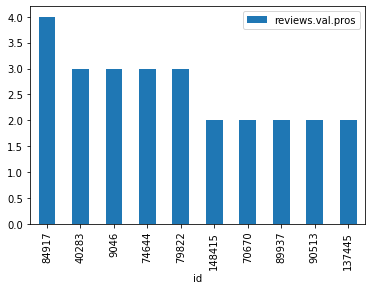

In [331]:
pros_401=df[df["reviews.val.pros"].str.contains("401")]
grp_pros_401=pros_401.groupby("id").count()#["reviews.val.pros"]
most_401_pros=grp_pros_401.sort_values(by="reviews.val.pros",ascending=False).reset_index()#["reviews.val.pros"]
most_401_pros=most_401_pros.head(10)
print(most_401_pros.head(100))
print(type(most_401_pros))
most_401_pros.plot.bar(x="id",y="reviews.val.pros")

In [ ]:
grp_pros_401

In [21]:
df.shape

(422180, 28)

In [22]:
pros_401=df[df["reviews.val.pros"].str.contains("salary")]
grp_pros_401=pros_401.groupby("id").count()
grp_pros_401

,index,reviews.val.cons,reviews.val.date,reviews.val.featured,reviews.val.helpfulCount,reviews.val.id,reviews.val.pros,reviews.val.publishedOn,reviews.val.publisher,reviews.val.reviewRatings.careerOpportunities,...,reviews.val.reviewerJobTitle,reviews.val.reviewerLocation,reviews.val.reviewerStatus,reviews.val.summaryPoints.ceoApproval,reviews.val.summaryPoints.outlook,reviews.val.summaryPoints.recommend,reviews.val.title,reviews.val.adviceToManagement,reviews.val.companyResponse,reviews.val.reviewResponses
id,,,,,,,,,,,,,,,,,,,,,
10,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
35,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
36,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
37,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165232,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
165237,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
165238,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0


In [30]:
pros_401=df[df["reviews.val.pros"].str.contains("manager")]
grp_pros_401=pros_401.groupby("id").count()
grp_pros_401[grp_pros_401==1.0].count()

index                                            8488
reviews.val.cons                                 8488
reviews.val.date                                 8488
reviews.val.featured                             8488
reviews.val.helpfulCount                         8488
reviews.val.id                                   8488
reviews.val.pros                                 8488
reviews.val.publishedOn                          8488
reviews.val.publisher                            8488
reviews.val.reviewRatings.careerOpportunities    8488
reviews.val.reviewRatings.compBenefits           8488
reviews.val.reviewRatings.cultureValues          8488
reviews.val.reviewRatings.overall                8488
reviews.val.reviewRatings.seniorManagement       8488
reviews.val.reviewRatings.worklifeBalance        8488
reviews.val.reviewerDuration                     7997
reviews.val.reviewerInformation                  8488
reviews.val.reviewerJobTitle                     7369
reviews.val.reviewerLocation

In [ ]:
df[df["reviews.val.pros"].str.contains("401")]


In [42]:
cons_401=df[df["reviews.val.cons"].str.contains("401")]
grp_cons_401=cons_401.groupby("id").count()
grp_cons_401

,index,reviews.val.cons,reviews.val.date,reviews.val.featured,reviews.val.helpfulCount,reviews.val.id,reviews.val.pros,reviews.val.publishedOn,reviews.val.publisher,reviews.val.reviewRatings.careerOpportunities,...,reviews.val.reviewerJobTitle,reviews.val.reviewerLocation,reviews.val.reviewerStatus,reviews.val.summaryPoints.ceoApproval,reviews.val.summaryPoints.outlook,reviews.val.summaryPoints.recommend,reviews.val.title,reviews.val.adviceToManagement,reviews.val.companyResponse,reviews.val.reviewResponses
id,,,,,,,,,,,,,,,,,,,,,
227,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
691,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
781,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
2211,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
3792,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161272,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
162023,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
163240,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0


In [41]:
cons_salary=df[df["reviews.val.cons"].str.contains("salary")]
grp_cons_salary=cons_401.groupby("id").count()
grp_cons_salary

,index,reviews.val.cons,reviews.val.date,reviews.val.featured,reviews.val.helpfulCount,reviews.val.id,reviews.val.pros,reviews.val.publishedOn,reviews.val.publisher,reviews.val.reviewRatings.careerOpportunities,...,reviews.val.reviewerJobTitle,reviews.val.reviewerLocation,reviews.val.reviewerStatus,reviews.val.summaryPoints.ceoApproval,reviews.val.summaryPoints.outlook,reviews.val.summaryPoints.recommend,reviews.val.title,reviews.val.adviceToManagement,reviews.val.companyResponse,reviews.val.reviewResponses
id,,,,,,,,,,,,,,,,,,,,,
12,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
25,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
37,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
40,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
60,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165238,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
165251,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
165274,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
